In [ ]:
# loading our dataset ：）
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
missing_value = ["N/a", "na", np.nan,"NaN"] 
train_file = pd.read_csv('train_ctrUa4K.CSV', header = None,na_values=missing_value)
uploaded = files.upload()
test_file = pd.read_csv('test_lAUu6dG.CSV', header = None,na_values=missing_value)
train_file.head()
uploaded = files.upload()
label = pd.read_csv('sample_submission_49d68Cx.txt', header = None,na_values=missing_value)
test_file.head()

Saving train_ctrUa4K.CSV to train_ctrUa4K.CSV


Saving test_lAUu6dG.CSV to test_lAUu6dG.CSV


Saving sample_submission_49d68Cx.txt to sample_submission_49d68Cx.txt


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Smiurban,Rural
1,LP001015,0,1,1,0,5720,0,110,360,1,1,0,0,0,1,0,0
2,LP001022,0,1,1,0,3076,1500,126,360,1,0,1,0,0,1,0,0
3,LP001031,0,1,1,0,5000,1800,208,360,1,0,0,1,0,1,0,0
4,LP001035,0,1,1,0,2340,2546,100,360,NaN,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [ ]:
# merge label file with test file
new_test = pd.merge(label, test_file)

# merging current two dataset with id
frame = [train_file, new_test]

new_dataset = pd.concat(frame)

dataset = new_dataset.drop(new_dataset.columns[[0]], axis = 1)

dataset.info()
dataset.drop([0])

dataset.head()
# x = new_dataset.drop(new_dataset.columns[[12]],axis=1)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       602 non-null    object
 1   2       612 non-null    object
 2   3       615 non-null    object
 3   4       583 non-null    object
 4   5       615 non-null    object
 5   6       615 non-null    object
 6   7       593 non-null    object
 7   8       601 non-null    object
 8   9       565 non-null    object
 9   10      615 non-null    object
 10  11      615 non-null    object
 11  12      615 non-null    object
 12  13      615 non-null    object
 13  14      615 non-null    object
 14  15      615 non-null    object
 15  16      615 non-null    object
 16  17      615 non-null    object
dtypes: object(17)
memory usage: 86.5+ KB


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,0,0,1,0,5849,0,NaN,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y


In [ ]:
# split the new train and test dataset

dataset_new = dataset.fillna(0)
dataset_new = dataset_new.drop(index = 0)
dic = {'Y':1,'N':0}
dataset_new[17] = dataset_new[17].map(dic)
x = dataset_new.drop(dataset.columns[[16]],axis=1) 
y = dataset_new[dataset.columns[[16]]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0


In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1


In [ ]:

dataset_feature = dataset.fillna(0)
x_feature = dataset_feature.drop(dataset.columns[[16]],axis=1) 
y_feature = dataset_feature[dataset.columns[[16]]]

# corrmat = dataset_feature.corr()
# top_corr = 

Train Accuracy  0.7556008146639511
Validation Mean Accuracy:  0.7046588332302618
Test Accuracy 0.6910569105691057
Train Accuracy  0.7881873727087576
Validation Mean Accuracy:  0.7169655741084313
Test Accuracy 0.7398373983739838
Train Accuracy  0.7718940936863544
Validation Mean Accuracy:  0.7271490414347558
Test Accuracy 0.7235772357723578
Train Accuracy  0.7922606924643585
Validation Mean Accuracy:  0.7169037311894455
Test Accuracy 0.7154471544715447
Train Accuracy  0.7861507128309573
Validation Mean Accuracy:  0.7250669964955678
Test Accuracy 0.7073170731707317
Train Accuracy  0.7861507128309573
Validation Mean Accuracy:  0.7107606679035251
Test Accuracy 0.7154471544715447
Train Accuracy  0.7922606924643585
Validation Mean Accuracy:  0.7209853638425068
Test Accuracy 0.7317073170731707
Train Accuracy  0.7841140529531568
Validation Mean Accuracy:  0.7128220985363842
Test Accuracy 0.7235772357723578
Train Accuracy  0.7861507128309573
Validation Mean Accuracy:  0.7291486291486292
Test Ac

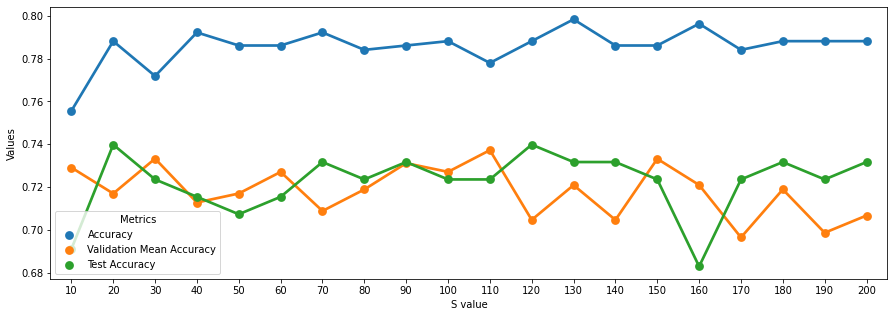

In [ ]:
# random forest 

x_train.head()
# y_train.drop([0])


accuracies=[]
VMA = []
test_accs=[]
def randomForest(size):
  rf_clf = RandomForestClassifier(n_estimators=size,max_depth=3,min_samples_leaf = 10)
  rf_clf.fit(x_train,y_train.values.ravel())
  y_pred = rf_clf.predict(x_train)

  # print("Train F1 Score ", f1_score(y_train,y_pred))
  print("Train Accuracy ", accuracy_score(y_train,y_pred))
  accuracies.append(accuracy_score(y_train,y_pred))
  # print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
  print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  VMA.append(cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  predictions = rf_clf.predict(x_test)
  test_acc = metrics.accuracy_score(y_test,predictions)
  print("Test Accuracy" , test_acc)
  test_accs.append(test_acc)

s =10
s_val=[]
for i in range(20):
  randomForest(s)
  s_val.append(s)
  s = s+10;
  
rand_plot = {"Accuracy": accuracies, "Validation Mean Accuracy": VMA, "Test Accuracy": test_accs, "S value": s_val}
rand_plot_df = pd.DataFrame.from_dict(rand_plot)
plt_df = rand_plot_df.melt('S value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="S value", y="Values",hue="Metrics", data=plt_df,ax=ax)



In [ ]:


c_vals = []
result = 0
c= 0.002
base = 1.8
for i in range (20):
    a = pow(base,i)
    result = a * c
    c_vals.append(result)
    
train_accuracy = []
test_accuracy = []
for c in c_vals:
    model = LogisticRegression(C=c, multi_class="multinomial", solver="lbfgs", penalty="l2")
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test) 
    test_accuracyScore = metrics.accuracy_score(y_test, predictions)
    
    train_accuracyScore = model.score(x_train, y_train)
    train_accuracy.append(train_accuracyScore)
    test_accuracy.append(test_accuracyScore)
    print("C value is ", c)
    print(train_accuracyScore)
    print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, predictions))
    



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C value is  0.002
0.6965376782077393
Accuracy (%): 66.66666666666666 %
Confusion Matrix:
[[ 0 40]
 [ 1 82]]
C value is  0.0036000000000000003
0.6965376782077393
Accuracy (%): 66.66666666666666 %
Confusion Matrix:
[[ 0 40]
 [ 1 82]]
C value is  0.0064800000000000005
0.6965376782077393
Accuracy (%): 67.47967479674797 %
Confusion Matrix:
[[ 0 40]
 [ 0 83]]
C value is  0.011664000000000002
0.7006109979633401
Accuracy (%): 69.10569105691057 %
Confusion Matrix:
[[ 2 38]
 [ 0 83]]
C value is  0.020995200000000002
0.7209775967413442
Accuracy (%): 68.29268292682927 %
Confusion Matrix:
[[ 5 35]
 [ 4 79]]
C value is  0.03779136
0.7494908350305499
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[12 28]
 [ 5 78]]
C value is  0.068024448
0.7678207739307535
Accuracy (%): 73.98373983739837 %
Confusion Matrix:
[[14 26]
 [ 6 77]]
C value is  0.12244400640000003
0.7596741344195519
Accuracy (%): 73.98373983739837 %
Confusion Matrix:
[[13 27]
 [ 5 78]]
C value is  0.22039921152000005
0.759674134419551

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C value is  2.3136627628523527
0.7637474541751528
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  4.164592973134235
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  7.496267351641624
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  13.493281232954923
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  24.28790621931886
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  43.71823119477395
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C value is  78.6928161505931
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]
C value is  141.64706907106762
0.7657841140529531
Accuracy (%): 73.17073170731707 %
Confusion Matrix:
[[13 27]
 [ 6 77]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

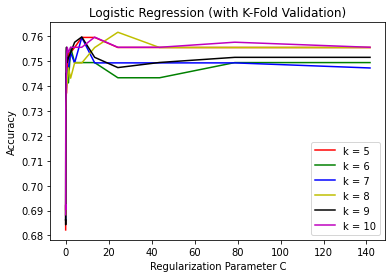

In [ ]:
k_vals = [5,6,7,8,9,10]
test_accs = []
for k in k_vals:
  fold_accs = []
  x_length = len(x_train)
  y_length = len(y_train)
  fold = x_length/k

  for c in c_vals:
    current_c = []
    for group in range(k):
      next_group = group+1
      start = int(fold*group)
      stop = int(fold * next_group)
      if group ==(k-1):
        x_train_training = x_train[0:start]
        y_train_training = y_train[0:start]
      elif group == 0:
        x_train_training = x_train[stop+1 : x_length]
        y_train_training = y_train[stop+1 : y_length]

      else:
        x_train_training_temp1 = np.array(x_train[0:start])
        x_train_training_temp2 = np.array(x_train[stop + 1 : x_length])
        x_train_training = np.concatenate((x_train_training_temp1, x_train_training_temp2))

        y_train_training_temp1 = np.array(y_train[0 : start])
        y_train_training_temp2 = np.array(y_train[stop + 1 : y_length])
        y_train_training = np.concatenate((y_train_training_temp1, y_train_training_temp2))

      x_train_test = x_train[start : stop]
      y_train_test = y_train[start : stop]

      clf2 = LogisticRegression(C=c, multi_class="multinomial", solver="lbfgs", penalty="l2")
      clf2.fit(x_train_training, y_train_training)
      y_test_pred = clf2.predict(x_train_test)
      test_acc = metrics.accuracy_score(y_train_test,y_test_pred)
      train_acc = clf2.score(x_train_training, y_train_training)

      current_c.append(test_acc)

    avg = sum(current_c)/len(current_c)
    fold_accs.append(avg)
  test_accs.append(fold_accs)

plt.title("Logistic Regression (with K-Fold Validation)")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.plot(c_vals, test_accs[0], 'r', label = "k = 5")
plt.plot(c_vals, test_accs[1], 'g', label = "k = 6")
plt.plot(c_vals, test_accs[2], 'b', label = "k = 7")
plt.plot(c_vals, test_accs[3], 'y', label = "k = 8")
plt.plot(c_vals, test_accs[4], 'k', label = "k = 9")
plt.plot(c_vals, test_accs[5], 'm', label = "k = 10")

plt.legend()


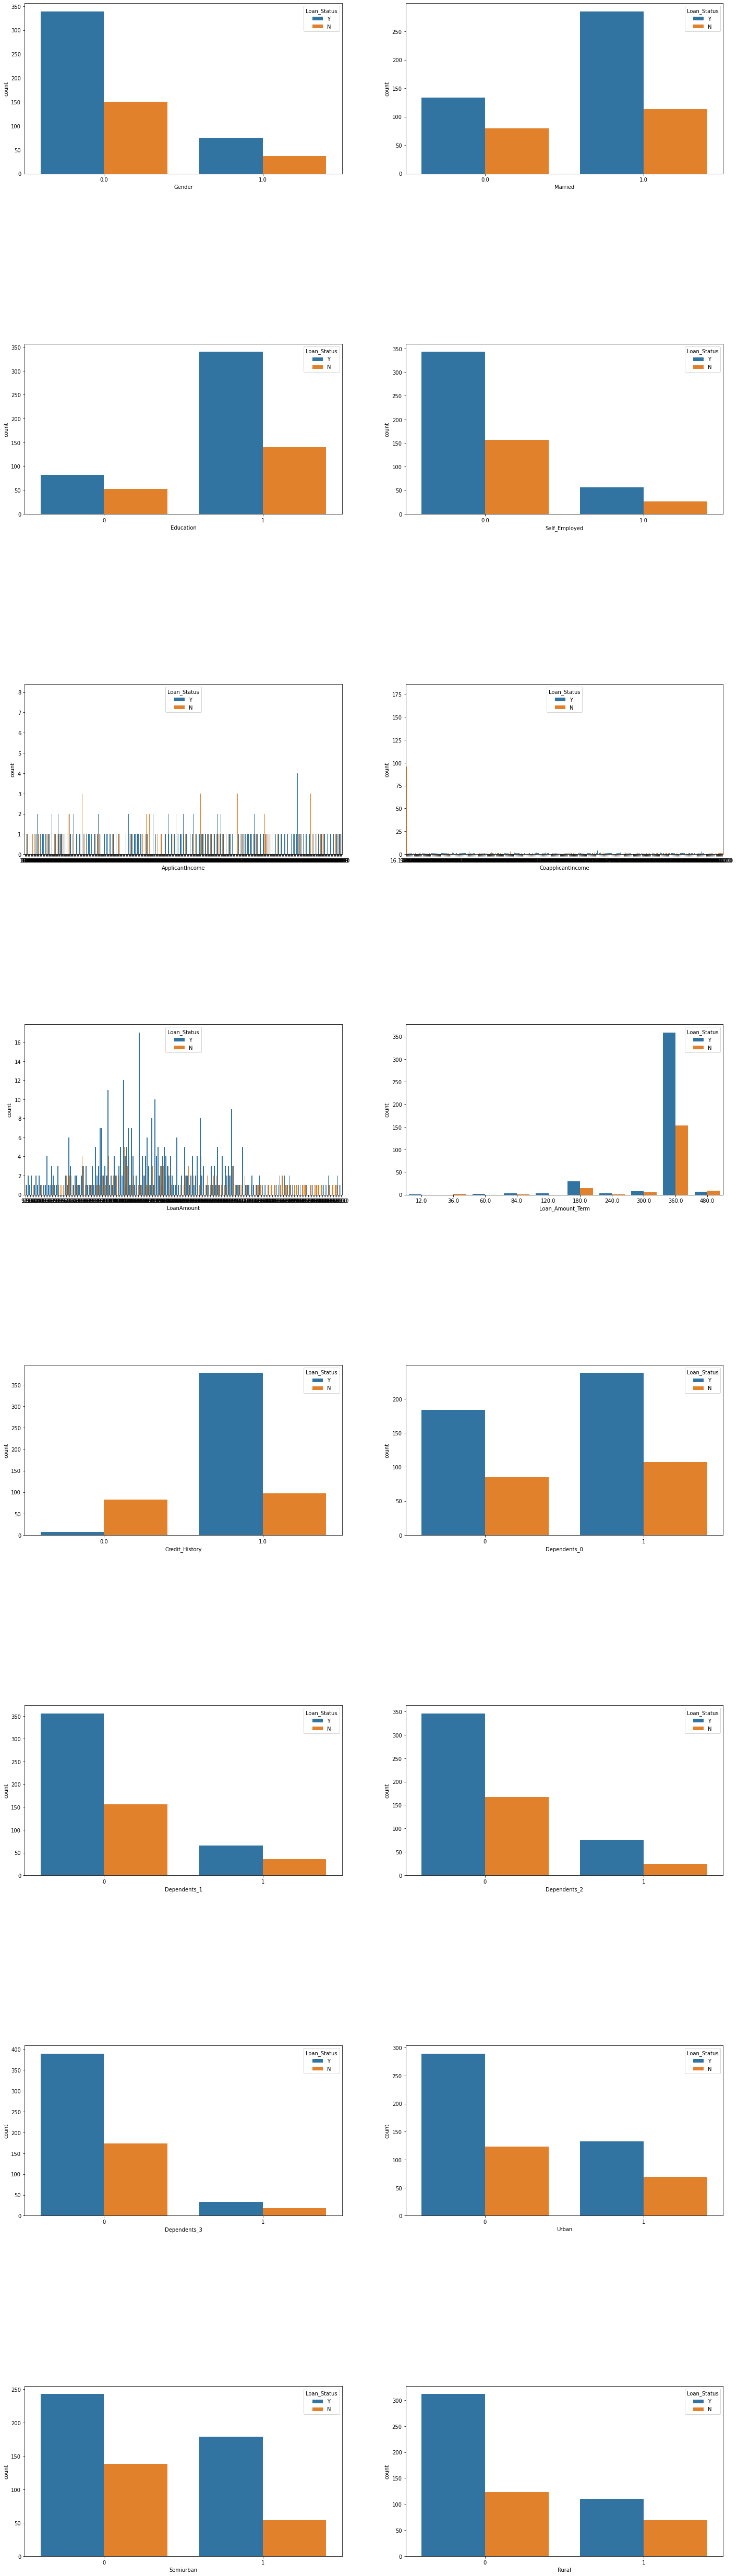

In [ ]:
#Data visiulization
import seaborn as sns

train_file_new = pd.read_csv('train_ctrUa4K.CSV')
train_file_new1 = train_file_new.drop(columns=['Loan_ID'])
categorical_columns =  ['Gender', 'Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                        'Credit_History', 'Dependents_0','Dependents_1','Dependents_2','Dependents_3','Urban','Semiurban','Rural']

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(8,2,figsize=(24,90))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_file_new,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1


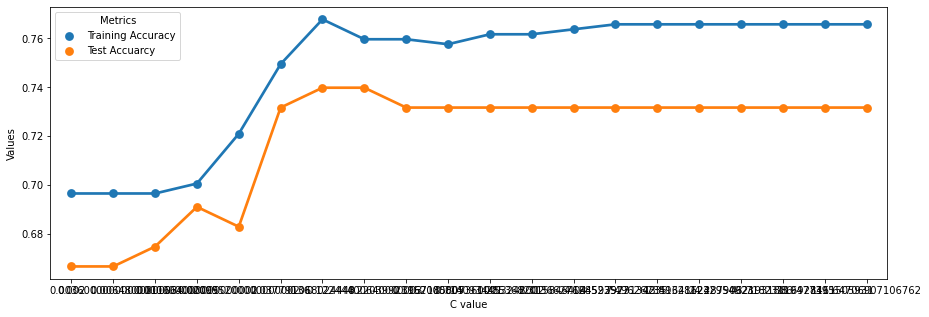

In [ ]:
Threshold_logreg = {"Training Accuracy": train_accuracy, "Test Accuarcy": test_accuracy, "C value": c_vals}
TS_LR_df = pd.DataFrame.from_dict(Threshold_logreg)
plot_df = TS_LR_df.melt('C value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="C value", y="Values",hue="Metrics", data=plot_df,ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

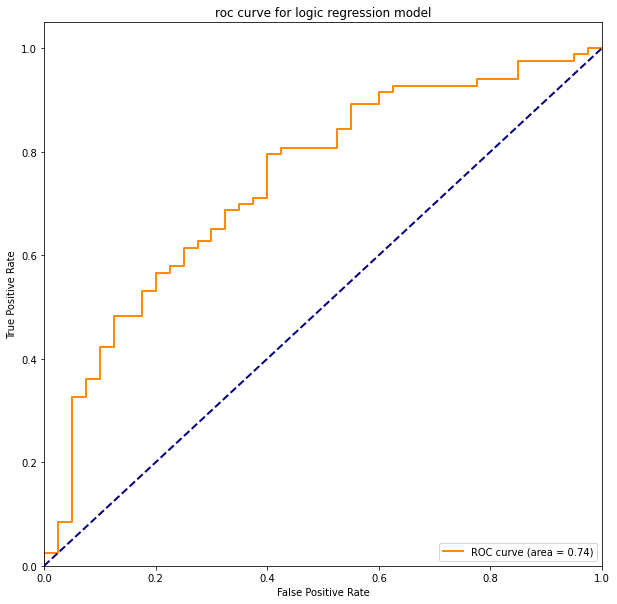

In [ ]:
# Roc Curve for Logistic Regression

from sklearn.metrics import roc_curve, auc 

###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
model_logic = LogisticRegression(C=0.22, multi_class="multinomial", solver="lbfgs", penalty="l2")
y_score = model_logic.fit(x_train, y_train).decision_function(x_test)


fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve for logic regression model')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

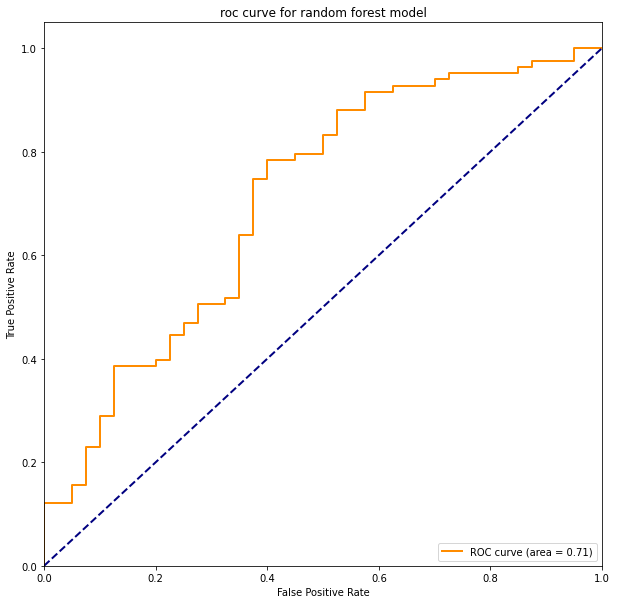

In [ ]:
from sklearn.metrics import plot_roc_curve

rf_clf = RandomForestClassifier(n_estimators=130,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train.values.ravel())
y_score = rf_clf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve for random forest model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# feature creation
# dataset.head()
dataset_new.head()
dataset_new
# dataset_new['new feature'] = dataset_new['Married'] * dataset_new['Education']

# dataset_new['18'] = dataset_new['2'] * dataset_new['3']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1


In [ ]:
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,0,0,1,0,5849,0,NaN,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


In [ ]:
# Feature creation (works!)

# build new feature from existing features 

# Gender and Married 
dataset_new[18] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[2].astype(str).astype(int))
# married and eduction 
dataset_new[19] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[3].astype(str).astype(int))
# Gender and Education 
dataset_new[20] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[3].astype(str).astype(int))

# Gender, Married and Education
dataset_new[21] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[2].astype(str).astype(int))* (dataset_new[3].astype(str).astype(int))

# Gender and Self_Employed
dataset_new[22] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Self_Employed and credit history
dataset_new[23] = (dataset_new[4].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Education & credit history
dataset_new[24] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Education & Self_Employed
dataset_new[25] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Education & Self_Employed & credit history
dataset_new[26] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))* (dataset_new[9].astype(str).astype(int))

# Married and Self_Employed
dataset_new[27] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Education and Self_Employed
dataset_new[28] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Gender & credit history
dataset_new[29] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Married & credit history
dataset_new[30] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))


# dataset_new

In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_feature = dataset_new.drop(dataset_new.columns[[16]],axis=1) 
y_feature = dataset_new[dataset.columns[[16]]]

# X = dataset_new.iloc[:,0:16]
# y = dataset_new.iloc [: , -1]

bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(x,y)
# fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd. concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['feature','Score']



In [ ]:
featureScores

,feature,Score
0,1,0.162407
1,2,1.534292
2,3,0.988390
3,4,0.007285
4,5,93.904964
5,6,11342.041603
6,7,3.829885
7,8,0.661295
8,9,26.014804
9,10,0.010509


In [ ]:
# print top 10
print(featureScores.nlargest(10,'Score'))

    feature         Score
5         6  11342.041603
4         5     93.904964
8         9     26.014804
14       15      7.103093
15       16      4.410584
6         7      3.829885
11       12      1.996446
1         2      1.534292
2         3      0.988390
13       14      0.783946


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.01034695 0.0121795  0.01340135 0.00878024 0.18660335 0.12795977
 0.19386269 0.0546485  0.09561622 0.02884563 0.02113714 0.01705114
 0.01397749 0.01789894 0.02319198 0.02140587 0.00645264 0.01362751
 0.00887709 0.00512711 0.0051685  0.00500159 0.04973892 0.0045446
 0.00314477 0.00664134 0.00477691 0.00699374 0.03299851]


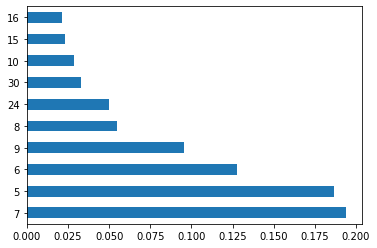

In [ ]:
# Feature Selection

# x_feature = dataset_new.drop(dataset_new.columns[[16]],axis=1) 
# y_feature = dataset_new[dataset.columns[[16]]]
# featrueSelection = ExtraTreesClassifier()
# featrueSelection.fit(x_feature, y_feature)
# print(featrueSelection.feature_importances_)
# feat_importances = pd.Series(featrueSelection.feature_importances_,index = x_feature.columns)
# feat_importances.nlargest(10).plot(kind = 'barh')


In [ ]:
import seaborn as sns

corrmat = dataset_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g=sns.heatmap(corrmat , annot=True)
plt.legend()

filename= "heatmap"

plt.savefig(filename)

plt.clf()


No handles with labels found to put in legend.


<Figure size 1440x1440 with 0 Axes>

# 新段落

# New Section

In [ ]:
dataset_new.corr()

,17,18,19,20,21,22,23,24,25,26,27,28,29,30
17,1.000000,0.027178,0.130869,-0.021963,0.014533,-0.029798,0.077573,0.331502,0.015138,0.085229,0.023394,0.015138,0.064069,0.304767
18,0.027178,1.000000,0.139832,0.424225,0.893441,0.156242,-0.028945,0.012473,-0.006812,-0.041461,0.033450,-0.006812,0.406055,0.113082
19,0.130869,0.139832,1.000000,-0.194394,0.204684,-0.095980,0.035369,0.367300,0.119515,0.117161,0.193500,0.119515,-0.211131,0.602674
20,-0.021963,0.424225,-0.194394,1.000000,0.490743,0.258708,-0.051727,0.113333,0.018697,-0.024891,-0.082029,0.018697,0.749111,-0.234557
21,0.014533,0.893441,0.204684,0.490743,1.000000,0.127539,-0.042506,0.076828,0.009466,-0.031211,0.023316,0.009466,0.397596,0.124958
22,-0.029798,0.156242,-0.095980,0.258708,0.127539,1.000000,0.294158,-0.071323,0.322739,0.184322,0.099857,0.322739,0.243996,-0.115018
23,0.077573,-0.028945,0.035369,-0.051727,-0.042506,0.294158,1.000000,0.121675,0.755917,0.880544,0.709890,0.755917,0.021571,0.125653
24,0.331502,0.012473,0.367300,0.113333,0.076828,-0.071323,0.121675,1.000000,0.106514,0.233648,0.018706,0.106514,0.166025,0.383904
25,0.015138,-0.006812,0.119515,0.018697,0.009466,0.322739,0.755917,0.106514,1.000000,0.865316,0.715558,1.000000,-0.044558,0.028711
26,0.085229,-0.041461,0.117161,-0.024891,-0.031211,0.184322,0.880544,0.233648,0.865316,1.000000,0.643445,0.865316,-0.014563,0.121041


In [ ]:
# Add five more features based on the heatMap feedback
dataset_new[31] = (dataset_new[25].astype(str).astype(int)) * (dataset_new[26].astype(str).astype(int))
dataset_new[32] = (dataset_new[25].astype(str).astype(int)) * (dataset_new[27].astype(str).astype(int))
dataset_new[33] = (dataset_new[27].astype(str).astype(int)) * (dataset_new[28].astype(str).astype(int))
dataset_new[34] = (dataset_new[26].astype(str).astype(int)) * (dataset_new[28].astype(str).astype(int))
dataset_new[35] = (dataset_new[23].astype(str).astype(int)) * (dataset_new[26].astype(str).astype(int))
dataset_new[36] = (dataset_new[23].astype(str).astype(int)) * (dataset_new[25].astype(str).astype(int))
dataset_new[37] = (dataset_new[23].astype(str).astype(int)) * (dataset_new[27].astype(str).astype(int))
dataset_new[38] = (dataset_new[23].astype(str).astype(int)) * (dataset_new[28].astype(str).astype(int))
dataset_new[39] = (dataset_new[22].astype(str).astype(int)) * (dataset_new[20].astype(str).astype(int))
dataset_new[40] = (dataset_new[22].astype(str).astype(int)) * (dataset_new[23].astype(str).astype(int))
dataset_new[41] = (dataset_new[22].astype(str).astype(int)) * (dataset_new[25].astype(str).astype(int))
dataset_new[42] = (dataset_new[22].astype(str).astype(int)) * (dataset_new[28].astype(str).astype(int))
dataset_new[43] = (dataset_new[22].astype(str).astype(int)) * (dataset_new[29].astype(str).astype(int))
dataset_new[44] = (dataset_new[17].astype(str).astype(int)) * (dataset_new[24].astype(str).astype(int))
dataset_new[45] = (dataset_new[17].astype(str).astype(int)) * (dataset_new[30].astype(str).astype(int))
dataset_new[46] = (dataset_new[18].astype(str).astype(int)) * (dataset_new[21].astype(str).astype(int))
dataset_new[47] = (dataset_new[18].astype(str).astype(int)) * (dataset_new[20].astype(str).astype(int))
dataset_new[48] = (dataset_new[18].astype(str).astype(int)) * (dataset_new[29].astype(str).astype(int))
dataset_new[49] = (dataset_new[19].astype(str).astype(int)) * (dataset_new[21].astype(str).astype(int))
dataset_new[50] = (dataset_new[19].astype(str).astype(int)) * (dataset_new[30].astype(str).astype(int))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.00610743 0.02044565 0.02452861 0.00499497 0.06641225 0.0468127
 0.06800199 0.02590623 0.05988901 0.01646782 0.01048014 0.00918758
 0.00571183 0.01219034 0.01676281 0.01365393 0.00351914 0.01105843
 0.00553098 0.0012785  0.00221681 0.00210656 0.04358224 0.00124383
 0.00070785 0.00309329 0.00163736 0.0053705  0.02867217 0.00040708
 0.00108232 0.00088411 0.00078387 0.00040074 0.00081807 0.0011268
 0.00065969 0.00166084 0.00094923 0.00133655 0.00080906 0.00105609
 0.28036279 0.16903633 0.00126525 0.0010075  0.00067313 0.00131002
 0.01679952]


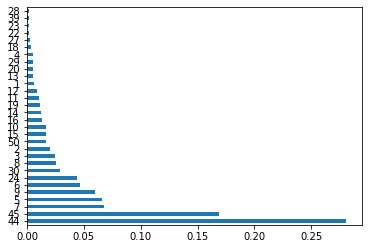

In [ ]:
# Feature Selection
x_feature = dataset_new.drop(dataset_new.columns[[16]],axis=1) 
y_feature = dataset_new[dataset.columns[[16]]]
featrueSelection = ExtraTreesClassifier()
featrueSelection.fit(x_feature, y_feature)
print(featrueSelection.feature_importances_)
feat_importances = pd.Series(featrueSelection.feature_importances_,index = x_feature.columns)
feat_importances.nlargest(30).plot(kind = 'barh')

In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1


In [ ]:
# drop features and run the model with the top 10

# columns=['B', 'C']
# df.drop(columns=['B', 'C'])
final_dataset = dataset_new.drop(columns=[21,26,28,31,32,33,34,35,36,37,38,39,40,41,42,43,47,48,49])
final_dataset


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,27,29,30,44,45,46,50
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1


In [ ]:
# split the new train and test dataset
from sklearn.model_selection import train_test_split
# dic = {'Y':1,'N':0}
# dataset_new[17] = dataset_new[17].map(dic)
x = final_dataset.drop(final_dataset.columns[[16]],axis=1) 
y = final_dataset[final_dataset.columns[[16]]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,22,23,24,25,27,29,30,44,45,46,50
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,1,1,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


Train Accuracy  0.8635437881873728
Validation Mean Accuracy:  0.8716965574108432
Test Accuracy 0.8211382113821138
Train Accuracy  0.9185336048879837
Validation Mean Accuracy:  0.9043083900226756
Test Accuracy 0.8292682926829268
Train Accuracy  0.90020366598778
Validation Mean Accuracy:  0.8716759431045145
Test Accuracy 0.8211382113821138
Train Accuracy  0.8615071283095723
Validation Mean Accuracy:  0.8634714491857348
Test Accuracy 0.7723577235772358
Train Accuracy  0.9083503054989817
Validation Mean Accuracy:  0.8819418676561535
Test Accuracy 0.8292682926829268
Train Accuracy  0.9164969450101833
Validation Mean Accuracy:  0.8717171717171717
Test Accuracy 0.8211382113821138
Train Accuracy  0.9042769857433809
Validation Mean Accuracy:  0.8757575757575757
Test Accuracy 0.8048780487804879
Train Accuracy  0.8655804480651731
Validation Mean Accuracy:  0.8737373737373737
Test Accuracy 0.7723577235772358
Train Accuracy  0.8778004073319755
Validation Mean Accuracy:  0.8798598227169656
Test Accu

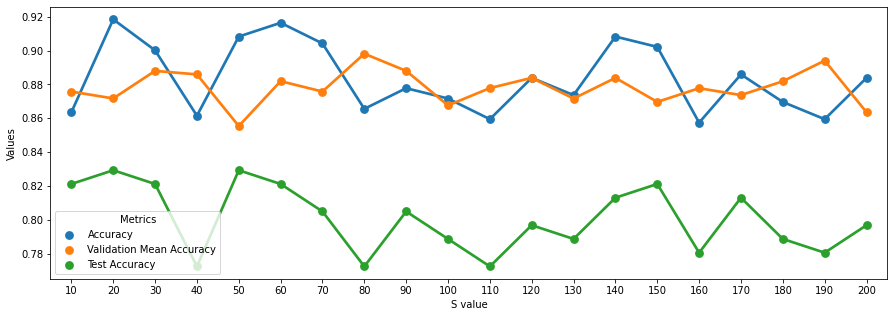

In [ ]:
# random forest 

x_train.head()
# y_train.drop([0])
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

accuracies=[]
VMA = []
test_accs = []

def randomForest(size):
  rf_clf = RandomForestClassifier(n_estimators=size,max_depth=3,min_samples_leaf = 10)
  rf_clf.fit(x_train,y_train.values.ravel())
  y_pred = rf_clf.predict(x_train)

  # print("Train F1 Score ", f1_score(y_train,y_pred))
  print("Train Accuracy ", accuracy_score(y_train,y_pred))
  accuracies.append(accuracy_score(y_train,y_pred))
  # print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
  print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  VMA.append(cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  predictions = rf_clf.predict(x_test)
  test_acc = metrics.accuracy_score(y_test,predictions)
  print("Test Accuracy" , test_acc)
  test_accs.append(test_acc)

s =10
s_val=[]
for i in range(20):
  randomForest(s)
  s_val.append(s)
  s = s+10;
  
rand_plot = {"Accuracy": accuracies, "Validation Mean Accuracy": VMA, "Test Accuracy": test_accs, "S value": s_val}
rand_plot_df = pd.DataFrame.from_dict(rand_plot)
plt_df = rand_plot_df.melt('S value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="S value", y="Values",hue="Metrics", data=plt_df,ax=ax)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict


c_vals = []
result = 0
c= 0.002
base = 1.8
for i in range (20):
    a = pow(base,i)
    result = a * c
    c_vals.append(result)
    
train_accuracy = []
test_accuracy = []
for c in c_vals:
    model = LogisticRegression(C=c, multi_class="multinomial", solver="lbfgs", penalty="l2")
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test) 
    test_accuracyScore = metrics.accuracy_score(y_test, predictions)
    
    train_accuracyScore = model.score(x_train, y_train)
    train_accuracy.append(train_accuracyScore)
    test_accuracy.append(test_accuracyScore)
    print("C value is ", c)
    print(train_accuracyScore)
    print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, predictions))
    



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

C value is  0.002
0.7026476578411406
Accuracy (%): 67.47967479674797 %
Confusion Matrix:
[[ 1 40]
 [ 0 82]]
C value is  0.0036000000000000003
0.7087576374745418
Accuracy (%): 65.85365853658537 %
Confusion Matrix:
[[ 1 40]
 [ 2 80]]
C value is  0.0064800000000000005
0.7739307535641547
Accuracy (%): 66.66666666666666 %
Confusion Matrix:
[[11 30]
 [11 71]]
C value is  0.011664000000000002
0.7922606924643585
Accuracy (%): 67.47967479674797 %
Confusion Matrix:
[[15 26]
 [14 68]]
C value is  0.020995200000000002
0.8105906313645621
Accuracy (%): 71.54471544715447 %
Confusion Matrix:
[[20 21]
 [14 68]]
C value is  0.03779136
0.845213849287169
Accuracy (%): 74.79674796747967 %
Confusion Matrix:
[[24 17]
 [14 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

C value is  0.068024448
0.8737270875763747
Accuracy (%): 81.30081300813008 %
Confusion Matrix:
[[32  9]
 [14 68]]
C value is  0.12244400640000003
0.8839103869653768
Accuracy (%): 80.48780487804879 %
Confusion Matrix:
[[31 10]
 [14 68]]
C value is  0.22039921152000005
0.8879837067209776
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

C value is  0.3967185807360001
0.8859470468431772
Accuracy (%): 80.48780487804879 %
Confusion Matrix:
[[31 10]
 [14 68]]
C value is  0.7140934453248002
0.8859470468431772
Accuracy (%): 80.48780487804879 %
Confusion Matrix:
[[31 10]
 [14 68]]
C value is  1.2853682015846404
0.8879837067209776
Accuracy (%): 80.48780487804879 %
Confusion Matrix:
[[31 10]
 [14 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

C value is  2.3136627628523527
0.8879837067209776
Accuracy (%): 80.48780487804879 %
Confusion Matrix:
[[31 10]
 [14 68]]
C value is  4.164592973134235
0.8879837067209776
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]
C value is  7.496267351641624
0.890020366598778
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

C value is  13.493281232954923
0.8879837067209776
Accuracy (%): 78.86178861788618 %
Confusion Matrix:
[[29 12]
 [14 68]]
C value is  24.28790621931886
0.890020366598778
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]
C value is  43.71823119477395
0.890020366598778
Accuracy (%): 78.86178861788618 %
Confusion Matrix:
[[29 12]
 [14 68]]
C value is  78.6928161505931
0.890020366598778
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]
C value is  141.64706907106762
0.890020366598778
Accuracy (%): 79.67479674796748 %
Confusion Matrix:
[[30 11]
 [14 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

流式输出内容被截断，只能显示最后 5000 行内容。

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for al

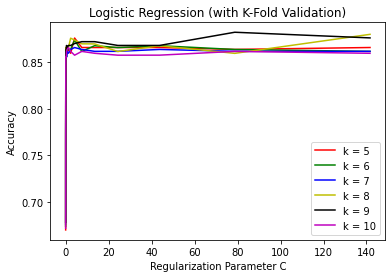

In [ ]:
k_vals = [5,6,7,8,9,10]
test_accs = []
for k in k_vals:
  fold_accs = []
  x_length = len(x_train)
  y_length = len(y_train)
  fold = x_length/k

  for c in c_vals:
    current_c = []
    for group in range(k):
      next_group = group+1
      start = int(fold*group)
      stop = int(fold * next_group)
      if group ==(k-1):
        x_train_training = x_train[0:start]
        y_train_training = y_train[0:start]
      elif group == 0:
        x_train_training = x_train[stop+1 : x_length]
        y_train_training = y_train[stop+1 : y_length]

      else:
        x_train_training_temp1 = np.array(x_train[0:start])
        x_train_training_temp2 = np.array(x_train[stop + 1 : x_length])
        x_train_training = np.concatenate((x_train_training_temp1, x_train_training_temp2))

        y_train_training_temp1 = np.array(y_train[0 : start])
        y_train_training_temp2 = np.array(y_train[stop + 1 : y_length])
        y_train_training = np.concatenate((y_train_training_temp1, y_train_training_temp2))

      x_train_test = x_train[start : stop]
      y_train_test = y_train[start : stop]

      clf2 = LogisticRegression(C=c, multi_class="multinomial", solver="lbfgs", penalty="l2")
      clf2.fit(x_train_training, y_train_training)
      y_test_pred = clf2.predict(x_train_test)
      test_acc = metrics.accuracy_score(y_train_test,y_test_pred)
      train_acc = clf2.score(x_train_training, y_train_training)

      current_c.append(test_acc)

    avg = sum(current_c)/len(current_c)
    fold_accs.append(avg)
  test_accs.append(fold_accs)

plt.title("Logistic Regression (with K-Fold Validation)")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.plot(c_vals, test_accs[0], 'r', label = "k = 5")
plt.plot(c_vals, test_accs[1], 'g', label = "k = 6")
plt.plot(c_vals, test_accs[2], 'b', label = "k = 7")
plt.plot(c_vals, test_accs[3], 'y', label = "k = 8")
plt.plot(c_vals, test_accs[4], 'k', label = "k = 9")
plt.plot(c_vals, test_accs[5], 'm', label = "k = 10")

plt.legend()


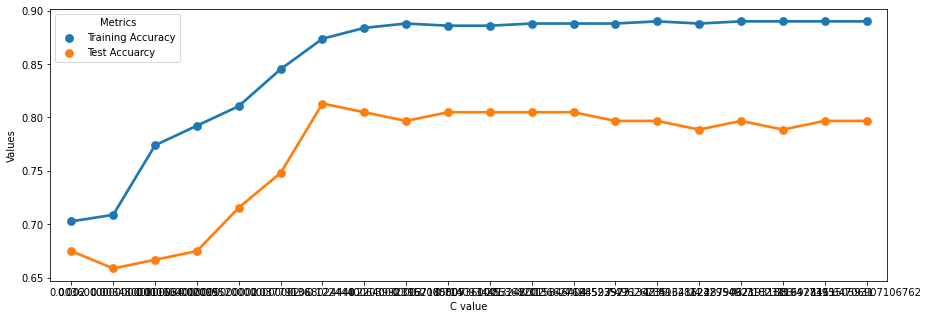

In [ ]:
Threshold_logreg = {"Training Accuracy": train_accuracy, "Test Accuarcy": test_accuracy, "C value": c_vals}
TS_LR_df = pd.DataFrame.from_dict(Threshold_logreg)
plot_df = TS_LR_df.melt('C value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="C value", y="Values",hue="Metrics", data=plot_df,ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

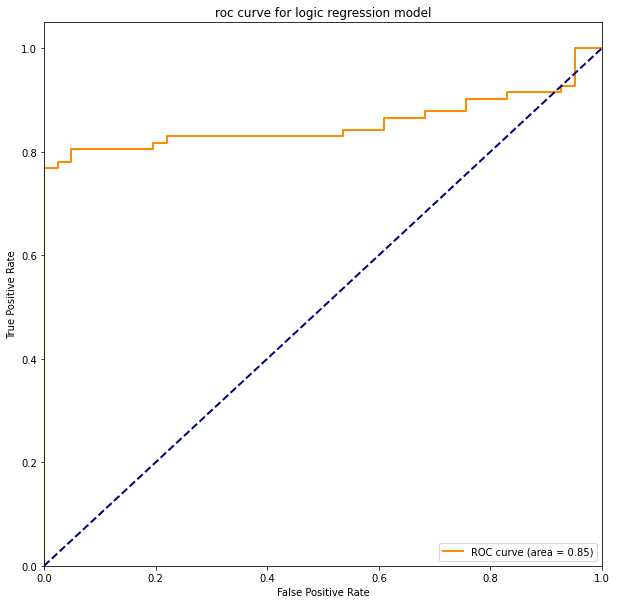

In [ ]:
# Roc Curve for Logistic Regression

from sklearn.metrics import roc_curve, auc 

###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
model_logic = LogisticRegression(C=10, multi_class="multinomial", solver="lbfgs", penalty="l2")
y_score = model_logic.fit(x_train, y_train).decision_function(x_test)


fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve for logic regression model')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

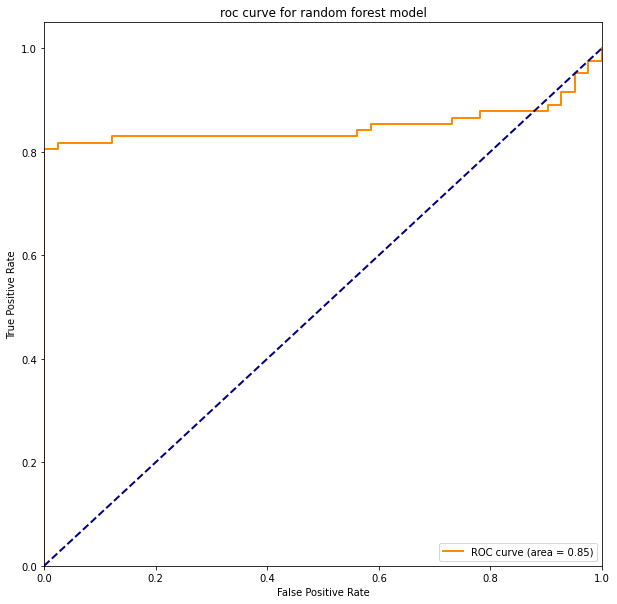

In [ ]:
from sklearn.metrics import plot_roc_curve

rf_clf = RandomForestClassifier(n_estimators=130,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train.values.ravel())
y_score = rf_clf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve for random forest model')
plt.legend(loc="lower right")
plt.show()